# B:

In [ ]:
# read in data
data <- read.table("lighthouse.dat", header=FALSE)

# display some of the data
head(data)

data <- data$V1
length(data)

We expect that the $x_k$ data is distributed like a Chauchy function around $x_0$. A first look on the data hints that this is indeed the case.

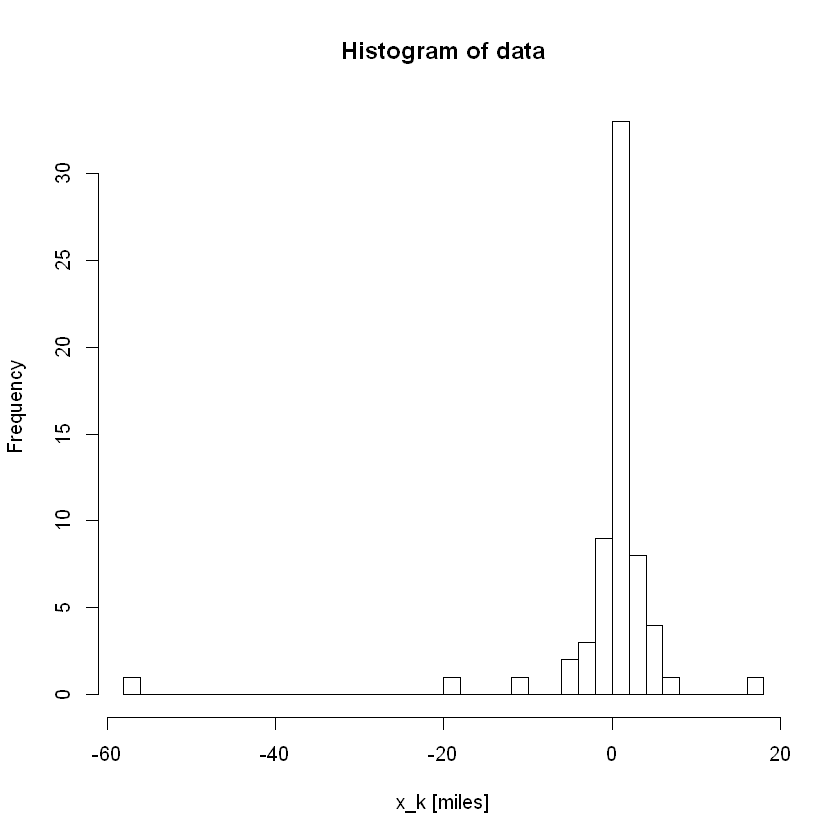

In [23]:
# histogram of x data
hist(data,breaks=50,xlab='x_k [miles]')

In [120]:
# function for the posterior with a gaussian prior

posterior1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)*dnorm(y,mean=2,sd=0.3)
}


In [173]:
# compute the posterior dependend for a y seq
yseq <- seq(0.0001,3,0.0001)

p1 <- yseq

for (i in 1:length(yseq)){
      p1[i] <- posterior1(yseq[i],data)
}

# integral
I <- mean(p1)*3

In [174]:
# new normalized posterior
posterior2 <- function(y,X){
    # likelihood times prior
    I**(-1)*prod(y*(y**2+(1.25-X)**2)**-1)*dnorm(y,mean=2,sd=0.3)
}

In [175]:
# compute normalized posterior for the sequence

p2 <- yseq
for (i in 1:length(yseq)){
      p2[i] <- posterior2(yseq[i],data)
}

In [182]:
# satistics
mode <- yseq[which.max(p2)]
mean <- sum(p2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(p2)/length(p2)*3-0.5)**2)]

sigy <- (sum(p2*yseq**2)*3/length(yseq)-mean**2)**0.5

cat('statistics\n---------------------')
cat('\nmode = ',mode)
cat('\nmean = ',mean)
cat('\nmedian = ',median)
cat('\nsigma_y = ',sigy)


statistics
---------------------
mode =  1.2986
mean =  1.330114
median =  1.3197
sigma_y =  0.2096681

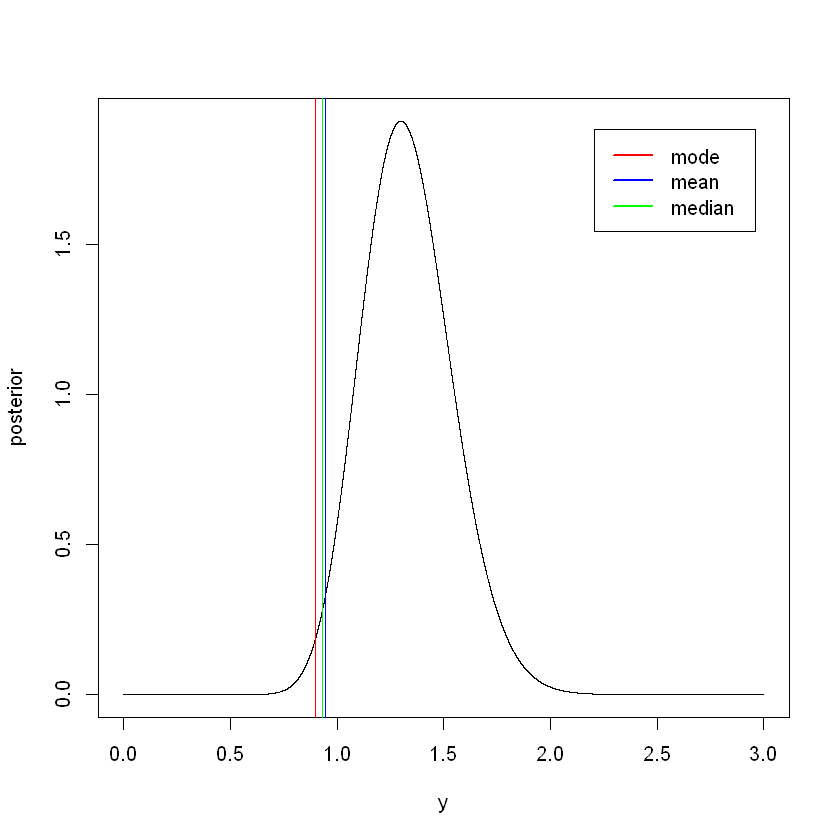

In [215]:
# plot the posterior dependend on y

plot(yseq,p2,'l',xlab='y',ylab='posterior')
abline(v=mode,col='red')
abline(v=mean,col='blue')
abline(v=median,col='green')

# legend
legend("topright", legend=c('mode','mean','median'), inset=.05, 
       lwd=2, col=c('red','blue','green'))

# C:

In [198]:
# posterior functions

# constant prior
posteriorcons1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)
}

# inverse y dependence prior
posteriorinv1 <- function(y,X){
    # likelihood times prior
    prod(y*(y**2+(1.25-X)**2)**-1)/y
}


In [199]:
# compute the posteriors dependend for a y seq
yseq <- seq(0.0001,3,0.0001)

pcons1 <- yseq
pinv1 <- yseq

for (i in 1:length(yseq)){
      pcons1[i] <- posteriorcons1(yseq[i],data)
      pinv1[i] <- posteriorinv1(yseq[i],data)
}

# integrals
Icons <- mean(pcons1)*3
Iinv <- mean(pinv1)*3

In [200]:
# normalized posterior functions

posteriorcons2 <- function(y,X){
    # likelihood times prior
    Icons**-1* prod(y*(y**2+(1.25-X)**2)**-1)
}

posteriorinv2 <- function(y,X){
    # likelihood times prior
    Iinv**-1* prod(y*(y**2+(1.25-X)**2)**-1)/y
}

In [201]:
# compute normalized posterior for the sequence

pcons2 <- yseq
pinv2 <- yseq

for (i in 1:length(yseq)){
      pcons2[i] <- posteriorcons2(yseq[i],data)
      pinv2[i] <- posteriorinv2(yseq[i],data)
}

In [206]:
# statistics
cat('statistics\n=================================')

# cnostant prior
cat('\n\nconstant prior\n---------------------')
mode <- yseq[which.max(pcons2)]
mean <- sum(pcons2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(pcons2)/length(pcons2)*3-0.5)**2)]

sigy <- (sum(pcons2*yseq**2)*3/length(yseq)-mean**2)**0.5


cat('\nmode = ',mode)
cat('\nmean = ',mean)
cat('\nmedian = ',median)
cat('\nsigma_y = ',sigy)


# inverse y dependence prior
cat('\n\ninverse y dependence prior\n---------------------')

mode <- yseq[which.max(pinv2)]
mean <- sum(pinv2*yseq)*3/length(yseq)

# we compute the median, by first computing the cumulative sum
median <- yseq[which.min((cumsum(pinv2)/length(pinv2)*3-0.5)**2)]

sigy <- (sum(pinv2*yseq**2)*3/length(yseq)-mean**2)**0.5


cat('\nmode = ',mode)
cat('\nmean = ',mean)
cat('\nmedian = ',median)
cat('\nsigma_y = ',sigy)


statistics

constant prior
---------------------
mode =  0.9286
mean =  0.9759626
median =  0.9598
sigma_y =  0.1790476

inverse y dependence prior
---------------------
mode =  0.8986
mean =  0.9442124
median =  0.9286
sigma_y =  0.1731443

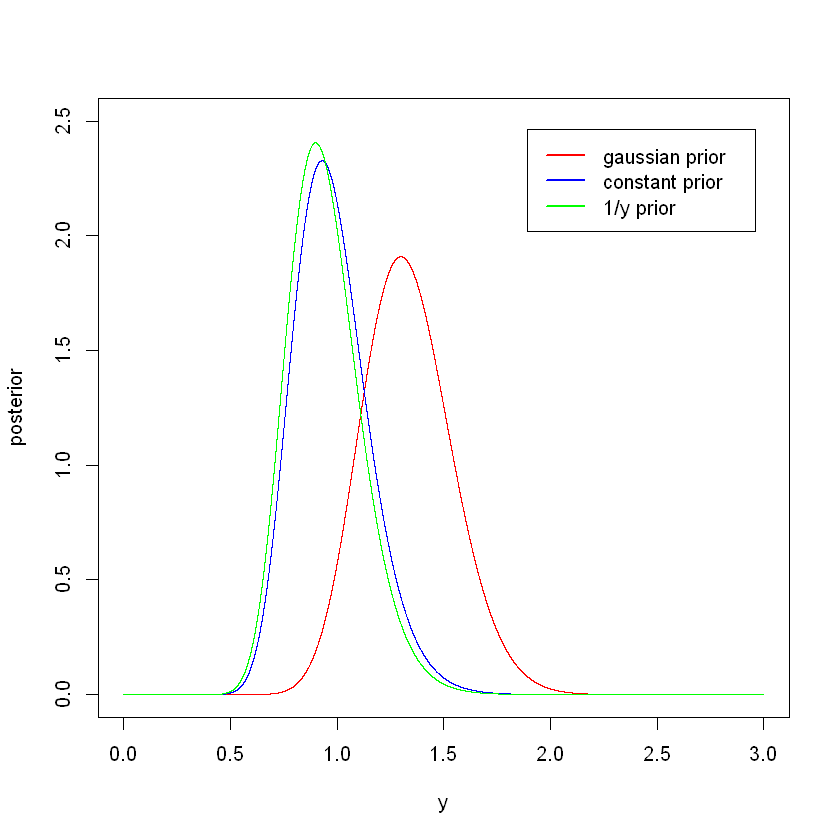

In [214]:
# plot the posterior dependend on y

plot(yseq,p2,'l',col='red',ylim=c(0,2.5),xlab='y',ylab='posterior')
lines(yseq,pcons2,col='blue')
lines(yseq,pinv2,col='green')

# legend
legend("topright", legend=c('gaussian prior','constant prior','1/y prior'), inset=.05, 
       lwd=2, col=c('red','blue','green'))